In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture 
import seaborn as sns
import pandas as pd

## Генерация выборок

In [160]:
uniform_distr = np.random.uniform(-5, 5, 100) # left, right border, elem num

normal_distr = np.random.normal(5, 5, 100) # M, sigma, elem num
normal_distr_mixture = np.concatenate((np.random.normal(-5, 3, 100), normal_distr))

exponential_distr = np.random.exponential(1, 100) # scale, elem num
exponential_distr_mixture = np.concatenate((np.random.exponential(5, 100), exponential_distr))

Существенные изменения происходят при увеличении/уменьшении ширины окна, в то время как изменение ядра практически не влияет на результат

In [109]:
x = np.linspace(-10, 10, 1000)

Реализация парзеновского окна (только одно ядро может быть незакомментированно)

In [112]:
def parzen_window(sample):
    p = np.zeros(x.shape[0])
    h = 1
    for i in range(x.shape[0]):
        obj_in_h = 0
        for val in sample:
            # obj_in_h += (2 * np.pi) ** (-1 / 2) * np.exp(((x[i] - val) ** 2) / -2) # g 
            if abs(x[i] - val) / h < 1:
                obj_in_h += 3 / 4 * (1 - (x[i] - val) ** 2) # e
                # obj_in_h += 15 / 16 * ((1 - abs(x[i] - val) ** 2) ** 2) # q 
                # obj_in_h += (1 - abs(x[i] - val)) # t 
                # obj_in_h += 1/2 # p 
        p[i] = obj_in_h / sample.shape[0] / h
    return p

## Визуализация

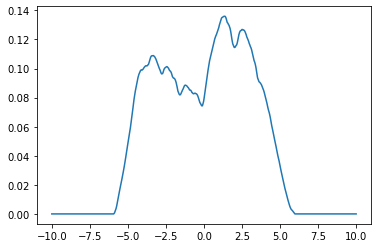

In [162]:
plt.plot(x, parzen_window(uniform_distr))


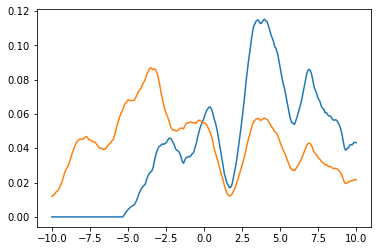

In [163]:
plt.plot(x, parzen_window(normal_distr))
plt.plot(x, parzen_window(normal_distr_mixture))

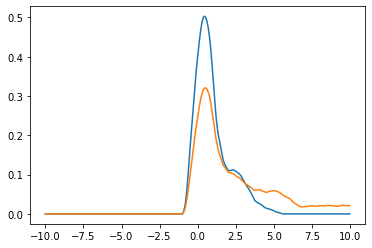

In [164]:
plt.plot(x, parzen_window(exponential_distr))
plt.plot(x, parzen_window(exponential_distr_mixture))

## Демонстрация с помощью Seaborn

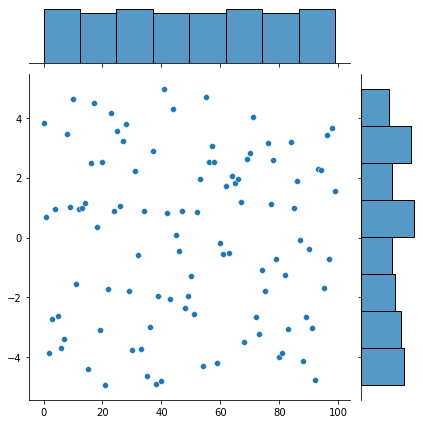

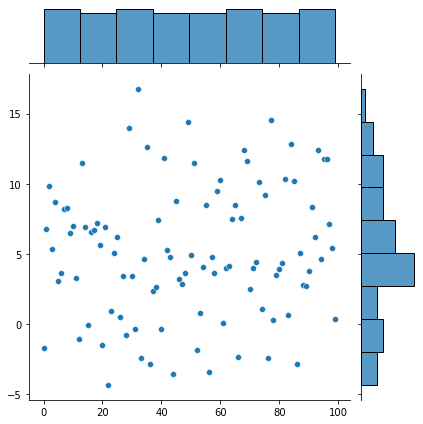

In [165]:
sns.jointplot(data=uniform_distr)
sns.jointplot(data=normal_distr)

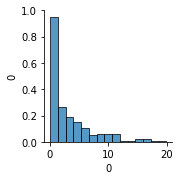

In [166]:
sns.pairplot(data=pd.DataFrame(exponential_distr_mixture))

## EM алгоритм

In [168]:
gm = GaussianMixture(n_components=2)
gm_y = gm.fit_predict(pd.DataFrame([i for i in range(200)], normal_distr_mixture))
np.round(gm.weights_,2)


array([0.51, 0.49])